In [1]:
# Load libraries with alias
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read data
data = pd.read_csv("05_10_19_all.csv")

# Preview the first 5 lines of the loaded data 
data.head()

,wallet_id,community,name,first_name,gender,lang,n_tok,atbt,phone,Called?,...,avg_balance,std_balance,poa,days_enrolled,days_since_trade_out,new_member,first_transaction,last_transaction_out,ambassador_name,Unnamed: 30
0,0x6e63c75540d889a365165811f974a8343e6d1f35,Congo,Susan Lukobo,Susan,Female,en,1,3.117647059,+254720630296,No answer,...,3330,1375,0.04016,164.0,2,1,2018-11-27,2019-05-08,Alex Omoro,NaN
1,0x70a343b5f411ddfa7b4adbf031ea5bdfbe27506a,Lindi,Synaida Muhonja,Synaida,Female,en,1,4.454545455,+254796922812,Ruth,...,842,749,0.04311,99.0,1,1,2019-01-31,2019-05-09,Job Orenge,NaN
2,0x0e5a6224bb6cda498f532da7f7d0fc2183870ea5,Congo,Keziah Tisi,Keziah,Female,en,1,3.903846154,+254704627360,No answer,...,1530,914,0.04111,205.0,2,1,2018-10-17,2019-05-08,Bonaventure Mwasela,NaN
3,0x31e87c53db77936cfc448e8d9b41edab78ebaa28,Lindi,Roseline Ombija,Roseline,Female,en,1,1.027972028,+254712296197,No answer,...,1111,730,0.04033,158.0,8,1,2018-12-03,2019-05-02,John Meyo,NaN
4,0xde0598d67e7b22c64462f6499e5329b6069e39ee,Congo,Roselyn Ouma,Roselyn,Female,en,1,17.18181818,+254712202803,Ruth,...,1492,968,0.00549,197.0,8,1,2018-10-25,2019-05-02,Kenneth Ngige,NaN


In [2]:
# DATA WRANGLING
# 1. Most of the current data is cumulative over the total time period 
# and needs to be shrunk to a weekly average per person
# 'active' is defined as the period for which a person a still trading OUT

active = data.days_enrolled - data.days_since_trade_out

# days.enrolled - days_since_traded out might equal 0, 
# so replace this with 1 to indicate there has only been 1 day of "active" trading
data['active'] = active.replace(0, 1)

total_vol = data.trade_volume_in + data.trade_volume_out
data['total_vol'] = total_vol

# Number of people traded (out) with per week
avg_partners_out_weekly = data.n_partners_out/(data.active/7)
data['avg_partners_out_weekly'] = avg_partners_out_weekly

# Number of trades placed (out) per week
no_trades_out_weekly = data.n_trades_out/(data.active/7)
data['no_trades_out_weekly'] = no_trades_out_weekly

# Number of trades placed (in) per week
no_trades_in_weekly = data.n_trades_in/(data.active/7)
data['no_trades_in_weekly'] = no_trades_in_weekly

# Trade volume (out) per week
trade_vol_out_weekly = data.trade_volume_out/(data.active/7)
data['trade_vol_out_weekly'] = trade_vol_out_weekly

# Trade volume (in) per week
trade_vol_in_weekly = data.trade_volume_in/(data.active/7)
data['trade_vol_in_weekly'] = trade_vol_in_weekly

# Total volume per week
total_vol_weekly = data.total_vol/(data.active/7)
data['total_vol_weekly'] = total_vol_weekly

# Monhtly income
monthly_income = data.trade_volume_in/(data.active/30)
data['monthly_income'] = monthly_income

# Separate data into female and male
female = data[data['gender'] == 'Female']
male = data[data['gender'] == 'Male']
tier_four = data[data['tier'] == 4]

In [4]:
# GENERAL STATISTICS
pf = len(female)/len(data)
print("% female in Sarafu network: ", pf)

pf_no_trades_out = sum(female['n_trades_out'])/sum(data['n_trades_out'])
print("% female total number of trades: ", pf_no_trades_out)

pf_trade_vol_out = sum(female.trade_volume_out)/sum(data.trade_volume_out)
print("% female total trading volume out: ", pf_trade_vol_out)

avgf_partner_out = sum(female.n_partners_out)/len(female)
print("Average number of trading partners per female: ", avgf_partner_out)

avgm_partner_out = sum(male.n_partners_out)/len(male)
print("Average number of trading partners per male: ", avgm_partner_out)

# This is best stratified into bins tiered by trading volume
avgf_partners_out_weekly = sum(female.avg_partners_out_weekly/len(female))
print("Average number of weekly out-trade patners per female: ", avgf_partners_out_weekly)

avgm_partners_out_weekly = sum(male.avg_partners_out_weekly/len(male))
print("Average number of weekly out-trade patners per male: ", avgm_partners_out_weekly)

avgf_no_trades_out_weekly = sum(female.no_trades_out_weekly)/len(female)
print("Average number of weekly trades placed per female: ", avgf_no_trades_out_weekly)

avgm_no_trades_out_weekly = sum(male.no_trades_out_weekly)/len(male)
print("Average number of weekly trades placed per male: ", avgm_no_trades_out_weekly)

avgf_no_trades_in_weekly = sum(female.no_trades_in_weekly)/len(female)
print("Average number of weekly trades received per female: ", avgf_no_trades_in_weekly)

avgm_no_trades_in_weekly = sum(male.no_trades_in_weekly)/len(male)
print("Average number of weekly trades received per male: ", avgm_no_trades_in_weekly)

avgf_trade_vol_out_weekly = sum(female.trade_vol_out_weekly)/len(female)
print("Average weekly trading volume created per female: ", avgf_trade_vol_out_weekly)

avgm_trade_vol_out_weekly = sum(male.trade_vol_out_weekly)/len(male)
print("Average weekly trading volume created per male: ", avgm_trade_vol_out_weekly)

avgf_trade_vol_in_weekly = sum(female.trade_vol_in_weekly)/len(female)
print("Average weekly trading volume received per female: ", avgf_trade_vol_in_weekly)

avgm_trade_vol_in_weekly = sum(male.trade_vol_in_weekly)/len(male)
print("Average weekly trading volume received per male: ", avgm_trade_vol_in_weekly)

avgf_total_vol_weekly = sum(female.total_vol_weekly)/len(female)
print("Average weekly total volume (in+out) per female: ", avgf_total_vol_weekly)

avgm_total_vol_weekly = sum(male.total_vol_weekly)/len(male)
print("Average weekly total volume (in+out) per male: ", avgm_total_vol_weekly)

avg_monthly_income = sum(data.monthly_income)/len(data)
print("Average monhtly income for CC users in 2019: ", avg_monthly_income)

avgf_monthly_income = sum(female.monthly_income)/len(female)
print("Average monthly income for female CC users in 2019: ", avgf_monthly_income)

avgm_monthly_income = sum(male.monthly_income)/len(male)
print("Average monthly income for male CC users in 2019: ", avgm_monthly_income)

% female in Sarafu network:  0.5548974943052392
% female total number of trades:  0.6132684252235934
% female total trading volume out:  0.6131059433564655
Average number of trading partners per female:  5.1182266009852215
Average number of trading partners per male:  4.158273381294964
Average number of weekly out-trade patners per female:  1.8474615146985793
Average number of weekly out-trade patners per male:  2.174500023785046
Average number of weekly trades placed per female:  2.882340366872151
Average number of weekly trades placed per male:  3.2450378610426
Average number of weekly trades received per female:  4.802436807329003
Average number of weekly trades received per male:  4.5950961072614875
Average weekly trading volume created per female:  219.54817701190626
Average weekly trading volume created per male:  213.35599891556038
Average weekly trading volume received per female:  311.4604432160029
Average weekly trading volume received per male:  283.51192850954453
Average we

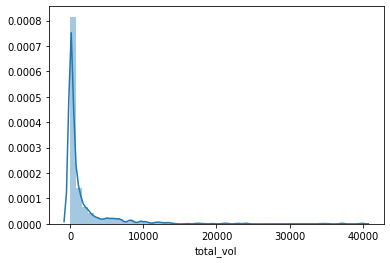

In [3]:
sns.distplot(female.total_vol)

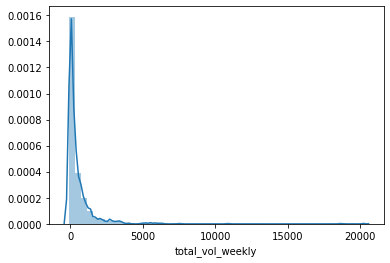

In [4]:
sns.distplot(female.total_vol_weekly)

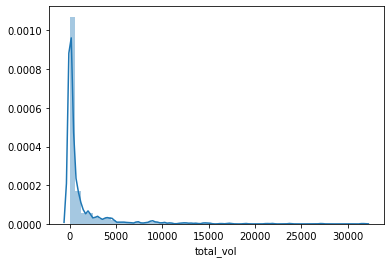

In [5]:
sns.distplot(male.total_vol)

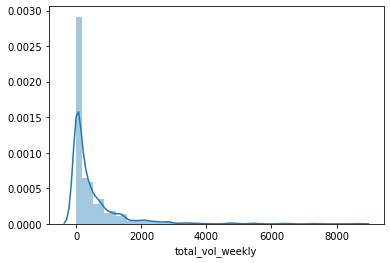

In [6]:
sns.distplot(male.total_vol_weekly)

In [7]:
female['total_vol'].max()-female['total_vol'].min()

39932

In [8]:
male['total_vol'].max()-male['total_vol'].min()

31638

In [9]:
len(tier_four[tier_four['gender'] == "Female"])/len(tier_four)

0.6026785714285714

In [10]:
pd.pivot_table(data,index=["community","gender"], values=['trade_vol_out_weekly', 'trade_vol_in_weekly'], aggfunc=[np.mean, np.sum])

mean                       \
                  trade_vol_in_weekly trade_vol_out_weekly   
community  gender                                            
Bangla     Female          175.827579           174.214189   
           Male            317.135373           166.957304   
           Other             0.000000             0.000000   
Congo      Female          274.178326           255.048884   
           Male            399.875859           383.562579   
Gatina     Female          224.909083           104.594536   
           Male            232.802771           115.811984   
Grassroots Female            0.000000             0.000000   
           Male              0.000000             0.000000   
Kangemi    Female          212.262222           119.900896   
           Male            111.464690            27.758907   
Lindi      Female          289.315419           328.131057   
           Male            264.169945           166.054845   
           Other            70.603448             3.017241   
Miyani     Female          595.402840           344.674270   
           Male            416.875893           336.592719   
Mkanyeni   Female          260.935783           100.897588   
           Male            171.802273           107.394307   
Mnyenzeni  Female          276.325570            79.899152   
           Male            227.879704           100.034026   
Ng'ombeni  Female          181.778981           123.451903   
           Male            132.905135            90.311025   
Olympic    Female           79.968335            65.098713   
           Male            130.100954            31.973428   
           Other             0.000000             0.000000   
Takaungu   Female          303.279631           285.626002   
           Male            234.090798           260.744738   

                                  sum                       
                  trade_vol_in_weekly trade_vol_out_weekly  
community  gender                                           
Bangla     Female        15648.654496         15505.062829  
           Male          13319.685656          7012.206751  
           Other             0.000000             0.000000  
Congo      Female        37836.609049         35196.746050  
           Male          51184.109960         49096.010145  
Gatina     Female        25639.635412         11923.777139  
           Male          25841.107538         12855.130200  
Grassroots Female            0.000000             0.000000  
           Male              0.000000             0.000000  
Kangemi    Female        14646.093352          8273.161838  
           Male           6242.022613          1554.498816  
Lindi      Female        55259.245003         62673.031831  
           Male          22982.785253         14446.771493  
           Other           141.206897             6.034483  
Miyani     Female       158377.155456         91683.355893  
           Male          99216.462647         80109.067070  
Mkanyeni   Female        10698.367088          4136.801122  
           Male           2233.429545          1396.125997  
Mnyenzeni  Female        22935.022345          6631.629579  
           Male          11621.864928          5101.735342  
Ng'ombeni  Female        14360.539487          9752.700365  
           Male           8904.644025          6050.838664  
Olympic    Female         7277.118445          5923.982853  
           Male           9497.369658          2334.060256  
           Other             0.000000             0.000000  
Takaungu   Female        16680.379704         15709.430101  
           Male          24813.624618         27638.942210